In [1]:
import os
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# 1) Loading and restructuring the data

In [3]:
dataPath = 'Data'
yearPath = os.listdir(dataPath)
stationPath = os.listdir(dataPath+'\\'+yearPath[0])

In [4]:
listOfDataFrames=[]
for year in yearPath:
    stationPath= os.listdir(dataPath+'\\'+year)
    for station in stationPath:
        filePath=dataPath+'\\'+year+'\\'+station
        print("Processing year: "+ year+" station: "+station)
        airQualityData=pd.read_csv(filePath, sep=';', header=12).rename(columns={'Start':'Start','Slut':'Stop'})
        airQualityData.rename(columns = lambda x: re.sub('NO2.*','NO2',x), inplace = True)
        airQualityData.rename(columns = lambda x: re.sub('PM10.*','PM10',x), inplace = True)
        airQualityData.rename(columns = lambda x: re.sub('PM2.5.*','PM2.5',x), inplace = True)
        airQualityData.rename(columns = lambda x: re.sub('NOX.*','NOX',x), inplace = True)
        listOfDataFrames.append(airQualityData)


Processing year: 2019 station: shair-157992-1-6-3.csv
Processing year: 2019 station: shair-18644-1-6-3.csv
Processing year: 2019 station: shair-8779-1-6-3.csv
Processing year: 2019 station: shair-8780-1-6-3.csv
Processing year: 2019 station: shair-8781-1-6-1.csv


In [5]:
airDataFrame= pd.DataFrame(columns= []) # This will contain all of the aggregated data
for airData in listOfDataFrames:
    airDataFrame=airDataFrame.append(airData)

In [6]:
airDataFrame.head(25)

,Start,Stop,NO2,NOX,PM10,PM2.5
0,2019-01-01 00:00,2019-01-01 01:00,13.0,22.7,31.5,21.4
1,2019-01-01 01:00,2019-01-01 02:00,10.5,17.1,12.6,8.3
2,2019-01-01 02:00,2019-01-01 03:00,6.1,12.5,5.4,3.4
3,2019-01-01 03:00,2019-01-01 04:00,4.0,8.6,3.9,2.5
4,2019-01-01 04:00,2019-01-01 05:00,6.5,10.4,5.5,3.2
5,2019-01-01 05:00,2019-01-01 06:00,5.2,7.7,5.3,3.1
6,2019-01-01 06:00,2019-01-01 07:00,2.4,5.1,3.9,2.5
7,2019-01-01 07:00,2019-01-01 08:00,2.8,4.6,3.1,1.8
8,2019-01-01 08:00,2019-01-01 09:00,3.0,7.1,2.4,1.5
9,2019-01-01 09:00,2019-01-01 10:00,6.2,10.2,2.5,1.5


# 2) Finding the outliers

In [7]:
airDataFrame.describe()

,NO2,NOX,PM10,PM2.5
count,43059.000000,43174.000000,43131.000000,40803.000000
mean,24.717437,49.019713,18.419221,5.973700
std,19.312911,53.942137,22.154517,4.863483
min,0.300000,0.500000,-3.000000,-3.000000
25%,9.900000,13.200000,7.200000,2.700000
50%,19.500000,30.400000,12.200000,4.700000
75%,34.500000,65.700000,20.900000,7.800000
max,154.100000,707.900000,388.500000,71.200000


##### 1- Boxplot

<AxesSubplot:xlabel='variable', ylabel='value'>

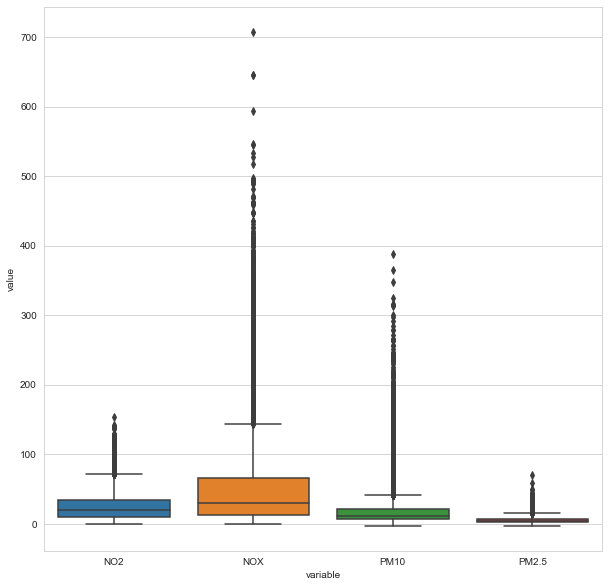

In [8]:
plt.figure(figsize=(10,10))
sns.set_style('whitegrid')
sns.boxplot(x='variable',y='value',data= pd.melt(airDataFrame[['NO2','NOX','PM10','PM2.5']]))

##### 2- Scatter plot

<AxesSubplot:xlabel='PM2.5', ylabel='PM10'>

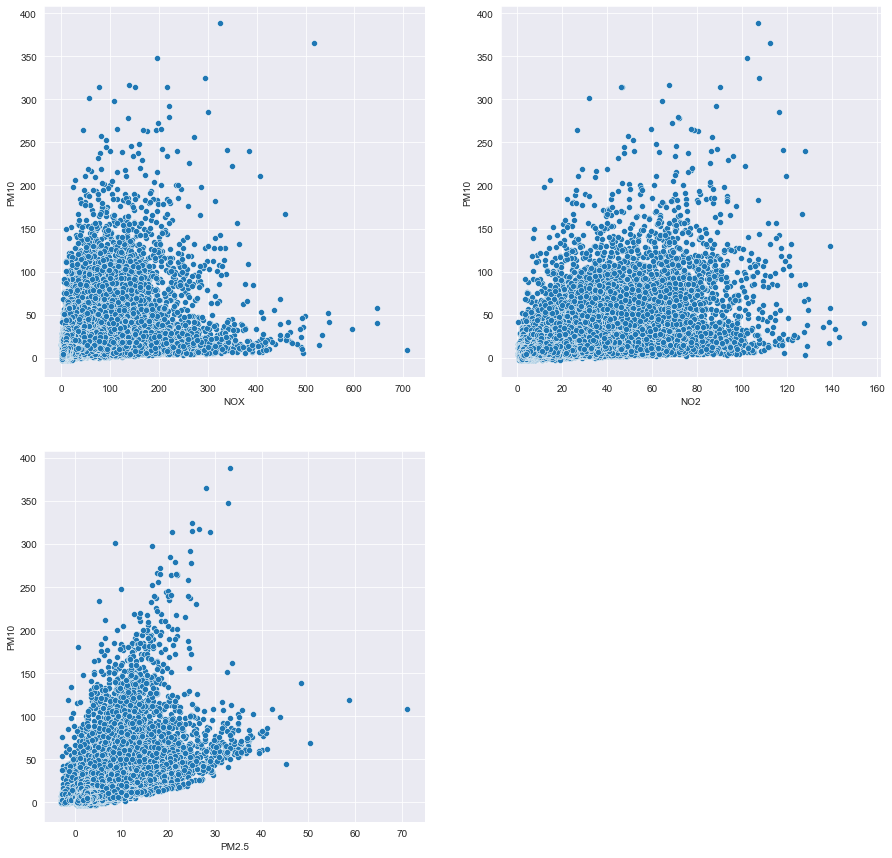

In [75]:
fig , ax =  plt.subplots(2,2,figsize=(15,15))
fig.delaxes(ax[1,1])
sns.set_style('darkgrid')
sns.scatterplot(  y="PM10", x= "NOX", data=airDataFrame, ax=ax[0,0])
sns.scatterplot(  y="PM10", x= "NO2", data=airDataFrame, ax=ax[0,1])
sns.scatterplot(  y="PM10", x= "PM2.5", data=airDataFrame, ax=ax[1,0])


##### 3- View the amount of data present

<AxesSubplot:>

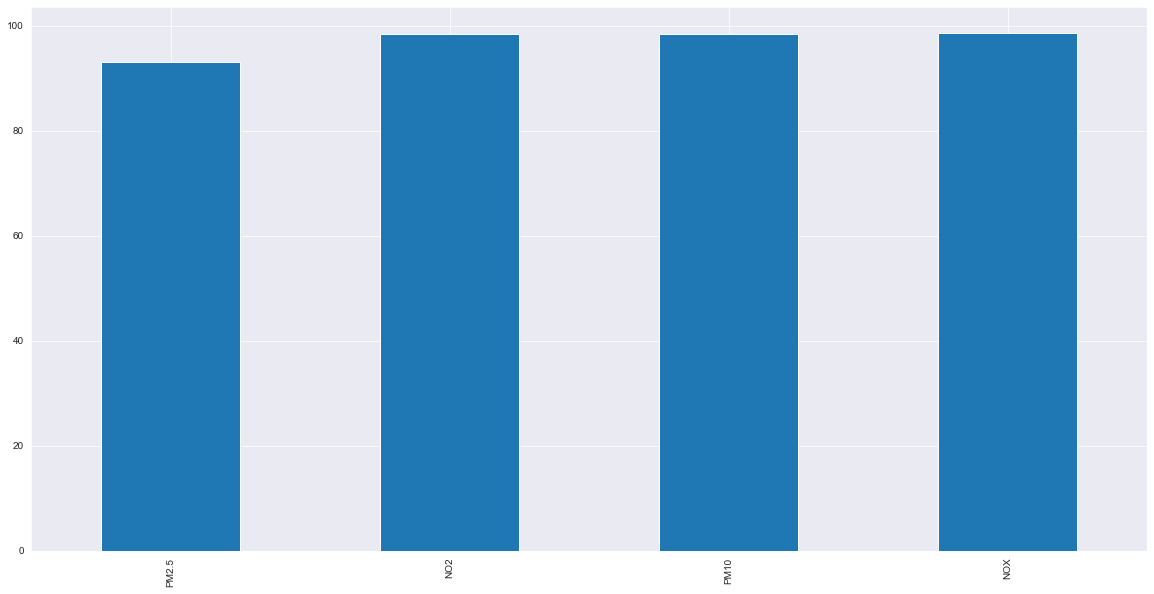

In [10]:
total = airDataFrame.isnull().sum().sort_values(ascending = False)
total = total[airDataFrame.isnull().sum().sort_values(ascending = False) != 0]
percent =  100 - total / len(airDataFrame) * 100
percent[airDataFrame.isnull().sum().sort_values(ascending = False) != 0].plot.bar(figsize = (20,10))

##### 4- Z-Score

In [93]:
temp_df=airDataFrame['NO2']
remove_nan = temp_df.dropna()
z = np.abs(stats.zscore(remove_nan))
print(z)

[0.60672223 0.73617081 0.96400032 ... 1.14005039 1.11933862 1.08309301]


# 3) Pre-processing


#### 1- Drop stop column

In [108]:
processed_df=airDataFrame.drop('Stop', axis = 1) #Drop the stop column
processed_df.head(5)

,Start,NO2,NOX,PM10,PM2.5
0,2019-01-01 00:00,13.0,22.7,31.5,21.4
1,2019-01-01 01:00,10.5,17.1,12.6,8.3
2,2019-01-01 02:00,6.1,12.5,5.4,3.4
3,2019-01-01 03:00,4.0,8.6,3.9,2.5
4,2019-01-01 04:00,6.5,10.4,5.5,3.2


###### 2- Dealing with the outliers (needs fixing)

In [ ]:
from scipy import stats
startCol=processed_df['Start']
processed_df=processed_df.drop(columns=['Start'])
processed_df=processed_df[(np.abs(stats.zscore(processed_df)) < 5).all(axis=1)]
processed_df.insert(1, 'Start', startCol, True)
sns.histplot(data=outlierDf['PM10'])

In [14]:
Q1 = processed_df.quantile(0.25)
Q3=  processed_df.quantile(0.75)
IQR= Q3-Q1
print(IQR)
processed_df = processed_df[~((processed_df < (Q1 - 1.5 * IQR)) |(processed_df > (Q3 + 1.5 * IQR))).any(axis=1)]

NO2      24.6
NOX      52.5
PM10     13.7
PM2.5     5.1
dtype: float64


##### 3- Dealing with missing values (Imputation)    -----------                 DOUBLE CHECK FOR OTHER METHODS THIS MIGHT NOT BE OPTIMAL

In [60]:
print(processed_df.isnull().sum()) # View the amount of missing data for each column

Start       0
NO2       741
NOX       626
PM10      669
PM2.5    2997
dtype: int64


In [109]:
processed_df['NO2'].fillna(processed_df['NO2'].mean(), inplace = True)
processed_df['NOX'].fillna(processed_df['NOX'].mean(), inplace = True)
processed_df['PM10'].fillna(processed_df['PM10'].mean(), inplace = True)
processed_df['PM2.5'].fillna(processed_df['PM2.5'].mean(), inplace = True)
print(processed_df.isnull().sum())

Start    0
NO2      0
NOX      0
PM10     0
PM2.5    0
dtype: int64


In [22]:
processed_df[(processed_df['NO2']<0) | (processed_df['NOX']<0) | (processed_df['PM10']<0) | (processed_df['PM2.5']<0)].head(25)

,Start,NO2,NOX,PM10,PM2.5
14,2019-01-01 14:00,30.1,52.1,6.1,-0.7
17,2019-01-01 17:00,24.3,41.6,2.3,-0.4
18,2019-01-01 18:00,16.4,31.4,5.5,-0.9
19,2019-01-01 19:00,12.9,24.5,2.1,-1.4
20,2019-01-01 20:00,11.0,20.0,2.0,-0.2
22,2019-01-01 22:00,5.6,11.1,4.4,-0.9
24,2019-01-02 00:00,5.4,8.7,4.7,-1.3
34,2019-01-02 10:00,23.6,45.8,29.5,-0.3
105,2019-01-05 09:00,26.9,48.5,3.3,-0.7
187,2019-01-08 19:00,41.9,49.4,5.8,-0.5


In [ ]:
corrMatrix = pdf.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()